In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "QCOM"
start = "2017-04-01"
end = "2024-01-20"

In [3]:
df = yf.download(ticker, start=start, end=end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-05,136.160004,138.070007,135.850006,136.729996,136.729996,6826500
2024-01-08,136.990005,139.149994,136.639999,139.029999,139.029999,7729400
2024-01-09,137.539993,140.949997,137.139999,139.889999,139.889999,5856900
2024-01-10,139.889999,140.029999,137.789993,139.309998,139.309998,5652500
2024-01-11,139.000000,139.949997,136.029999,139.029999,139.029999,7374900
2024-01-12,142.119995,142.660004,139.160004,140.199997,140.199997,6539600
2024-01-16,140.000000,141.229996,137.979996,141.119995,141.119995,7483000
2024-01-17,139.619995,139.630005,137.350006,139.320007,139.320007,6584700
2024-01-18,143.149994,145.649994,142.330002,145.289993,145.289993,12893000


In [4]:
ClosingPrice = df['Close']

# print(data)
print(ClosingPrice.values.shape)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ClosingPrice.values.reshape(-1, 1))
# print(scaled_data)

(1711,)


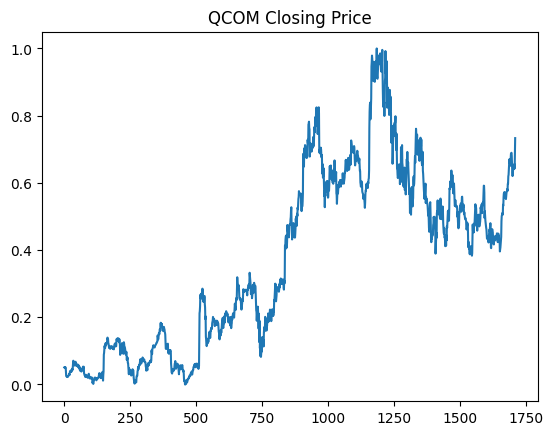

In [5]:
plt.plot(scaled_data)
plt.title(f'{ticker} Closing Price')
plt.show()

In [6]:
training_data_len = int(len(scaled_data) * 0.8)

training_data = scaled_data[0:training_data_len, :]
testing_data = scaled_data[training_data_len:, :]

len(training_data), len(testing_data)

(1368, 343)

In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
len(X_train) + len(X_test), len(scaled_data)

(1709, 1711)

In [9]:
X_train.shape

(1367, 1, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
7/7 [==============================] - 5s 11ms/step - loss: 0.1753
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1280
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0887
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0684
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0677
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0573
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0446
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0123
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 11/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 12/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 13/200
7/7 [==============================] - 0s 8ms/s

7/7 [==============================] - 0s 8ms/step - loss: 3.6436e-04
Epoch 101/200
7/7 [==============================] - 0s 8ms/step - loss: 3.6449e-04
Epoch 102/200
7/7 [==============================] - 0s 7ms/step - loss: 3.6174e-04
Epoch 103/200
7/7 [==============================] - 0s 8ms/step - loss: 3.6778e-04
Epoch 104/200
7/7 [==============================] - 0s 8ms/step - loss: 3.7234e-04
Epoch 105/200
7/7 [==============================] - 0s 8ms/step - loss: 3.6796e-04
Epoch 106/200
7/7 [==============================] - 0s 8ms/step - loss: 3.6404e-04
Epoch 107/200
7/7 [==============================] - 0s 7ms/step - loss: 3.6286e-04
Epoch 108/200
7/7 [==============================] - 0s 7ms/step - loss: 3.6559e-04
Epoch 109/200
7/7 [==============================] - 0s 8ms/step - loss: 3.6904e-04
Epoch 110/200
7/7 [==============================] - 0s 7ms/step - loss: 3.8052e-04
Epoch 111/200
7/7 [==============================] - 0s 8ms/step - loss: 3.7118e-04
Epoch 

7/7 [==============================] - 0s 7ms/step - loss: 3.6203e-04
Epoch 198/200
7/7 [==============================] - 0s 7ms/step - loss: 3.6880e-04
Epoch 199/200
7/7 [==============================] - 0s 6ms/step - loss: 3.6606e-04
Epoch 200/200
7/7 [==============================] - 0s 6ms/step - loss: 3.6547e-04


In [11]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [12]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [13]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.683166051835323
Root Mean Squared Error (RMSE): 2.665626360754403


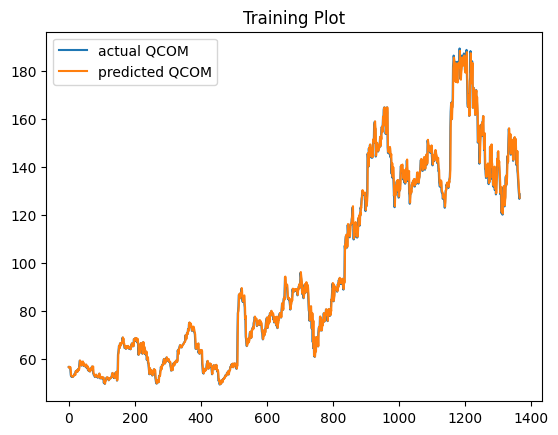

In [14]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 2.013322462115371
Root Mean Squared Error (RMSE): 2.667243430327057


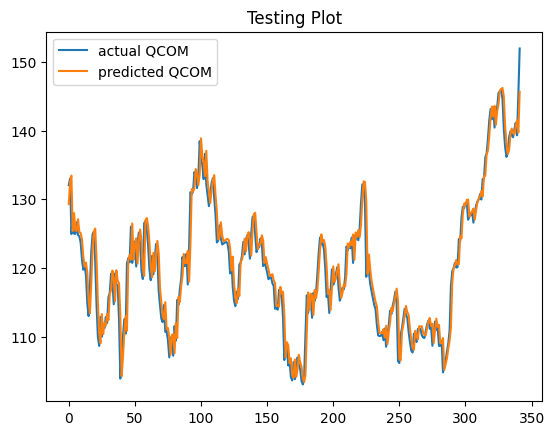

In [15]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

## 5 days future prediction without correction

In [16]:
scaled_data

array([[0.05075778],
       [0.0520446 ],
       [0.05054332],
       ...,
       [0.64283677],
       [0.68551611],
       [0.73319994]])

In [17]:
len(X_train), len(X_test),  len(scaled_data)

(1367, 342, 1711)

In [18]:
reshaped_data = scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1)

In [19]:
future_data_to_predict = reshaped_data[-10:]
future_data_to_predict

array([[[0.62432082]],

       [[0.6407635 ]],

       [[0.64691164]],

       [[0.64276521]],

       [[0.6407635 ]],

       [[0.6491278 ]],

       [[0.65570486]],

       [[0.64283677]],

       [[0.68551611]],

       [[0.73319994]]])

In [20]:
X_test.ndim, reshaped_data.ndim

(3, 3)

In [21]:
def predict_future(last_input):
    
    res = model.predict(last_input)
    Output = scaler.inverse_transform(res)
    return Output

future_predictions_1 = predict_future(future_data_to_predict)
# print(future_predictions_1)

future_predictions_1 = future_predictions_1.flatten()
print(future_predictions_1)

1/1 [==============================] - 0s 33ms/step
[137.15091 139.43692 140.29086 139.715   139.43692 140.59857 141.51141
 139.72493 145.64209 152.22414]


In [22]:
# def predict_future(last_input):
    
#     res = model.predict(last_input)
#     Output = scaler.inverse_transform(res)
#     return Output

# future_predictions_2 = predict_future(X_test[-5:])
# # print(future_predictions_2)

# future_predictions_2 = future_predictions_2.flatten()
# print(future_predictions_2)

In [23]:
day=range(1,(len(future_data_to_predict)+1))

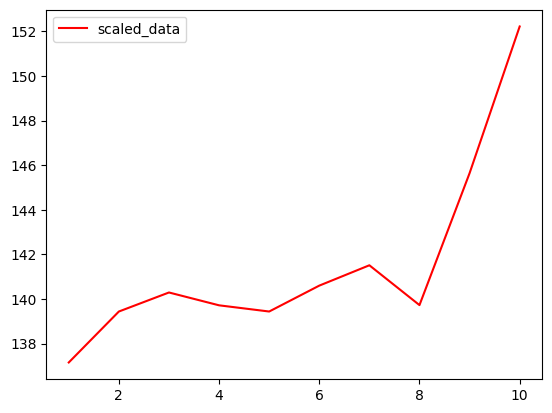

In [24]:
plt.plot(day, future_predictions_1, color='red', label='scaled_data')
# plt.plot(day, future_predictions_2, color='blue', label='x_test')
plt.legend()
plt.show()

In [25]:
# ticker = "AMZN"
# start='2024-01-22'
# end='2024-01-26'
# df = yf.download(ticker, start=start, end=end)
# # print(df)
# actual = df['Close'].values
# print(actual)

In [26]:
# day_actual = np.arange(1,21)
# day_pred = np.arange(1,21)

In [27]:
# plt.figure(figsize=(8,6))
# plt.title(f'Plot for {ticker} from {start} till {end}')
# plt.xlabel('No. of Days')
# plt.ylabel('Price Values')
# plt.plot(day_actual, actual, label = 'actual price', color='blue')
# plt.plot(day_pred, future_predictions_1, label = 'predicted price', color='red')
# plt.legend()
# plt.show()

## Buy and Sell

In [28]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

# def buy_and_sell_bot(val, controls):
#     inv = []
#     curr_val = 1000
#     buy_inds = np.where(controls > 0)[0]
#     sell_inds = np.where(controls < 0)[0]
    
#     if buy_inds.size == 0 or sell_inds.size == 0:
#         return [curr_val] * len(controls)
    
#     max_limit = max(sell_inds[-1], buy_inds[-1])
#     for i in range(buy_inds[0] + 2):
#         inv.append(curr_val)
        
#     for i in range(buy_inds[0], max_limit + 1):
#         if controls[i] > 0:
#             buy_val = val[i + 1]
#         elif controls[i] < 0:
#             sell_val = val[i + 1]
#             curr_val = curr_val * sell_val / buy_val
#         inv.append(curr_val)
        
#     if max_limit + 1 != len(controls):
#         for i in range(len(controls) - max_limit - 1):
#             inv.append(curr_val)
    
#     return inv

In [29]:
controls_pred= get_control_vector(future_predictions_1)
amount_pred = buy_and_sell_bot(future_predictions_1, controls_pred)
controls_pred, amount_pred

(array([ 0., -2.,  0.,  2.,  0., -2.,  2.,  0.], dtype=float32),
 [1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1014.8776479409701,
  1014.8776479409701,
  1014.8776479409701])

In [30]:
# controls_actual= get_control_vector(actual)
# amount_actual = buy_and_sell_bot(actual, controls_actual)
# controls_actual, amount_actual

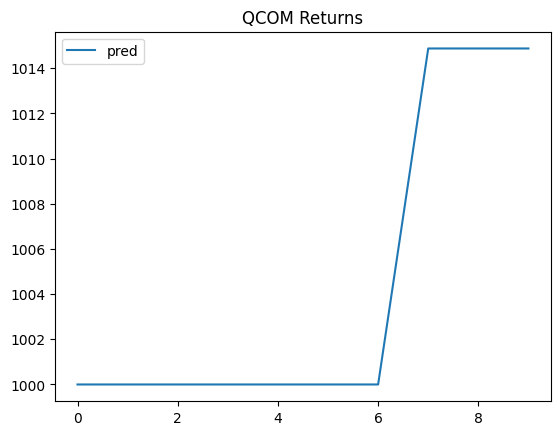

In [31]:
# plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title(f"{ticker} Returns")
plt.show()

### Price values along with dates

In [32]:
from datetime import datetime, timedelta
count=31
Date = []
for i in range(22,34):
    if i == 27:
        continue
    elif i == 28:
        continue
    elif i >= 32:
        i = i-count
        base_date = datetime(2024,2,i)
        formatted_date = base_date.strftime('%d-%m-%Y')
        Date.append(formatted_date)
    else:
        base_date = datetime(2024,1,i)
        formatted_date = base_date.strftime('%d-%m-%Y')
        Date.append(formatted_date)

In [33]:
price_value_dict = {}
price_value_dict['Date'] = Date
price_value_dict['Closing Price'] = future_predictions_1.tolist()

In [34]:
# price_value_dict

In [35]:
Price_with_dates = pd.DataFrame(price_value_dict)

In [36]:
Price_with_dates.columns = pd.MultiIndex.from_tuples([(f'{ticker}', 'Date'), (f'{ticker}', 'Closing Price')])

In [37]:
Price_with_dates

QCOM              
         Date Closing Price
0  22-01-2024    137.150909
1  23-01-2024    139.436920
2  24-01-2024    140.290863
3  25-01-2024    139.714996
4  26-01-2024    139.436920
5  29-01-2024    140.598572
6  30-01-2024    141.511414
7  31-01-2024    139.724930
8  01-02-2024    145.642090
9  02-02-2024    152.224136

In [38]:
ticker = "QCOM"
start = "2024-01-22"
end = "2024-01-31"

In [39]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-22,152.750000,154.570007,151.869995,152.869995,152.869995,10456100
2024-01-23,152.869995,153.740005,151.410004,153.500000,153.500000,6232300
2024-01-24,154.789993,156.320007,153.899994,154.369995,154.369995,8331900
2024-01-25,157.600006,157.979996,153.669998,154.470001,154.470001,7740900
2024-01-26,152.210007,152.979996,150.380005,150.720001,150.720001,7744200
2024-01-29,150.399994,151.240005,148.419998,149.639999,149.639999,10763600
2024-01-30,148.000000,148.800003,147.179993,147.380005,147.380005,2567412


In [40]:
actual_data = df['Close'].values

In [41]:
day_actual = range(1,8)
day_predicted = range(1,11)

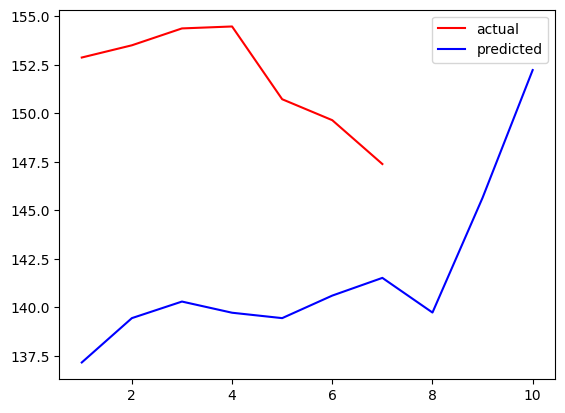

In [42]:
plt.plot(day_actual, actual_data, color='red', label='actual')
plt.plot(day_predicted, future_predictions_1, color='blue', label='predicted')
plt.legend()
plt.show()